#### 封装我们自己的SGD

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
x = np.linspace(-5, 5, 100001)
X = x.reshape(-1, 1)
y = 3. * x + 1. + np.random.normal(0, 6, x.shape)

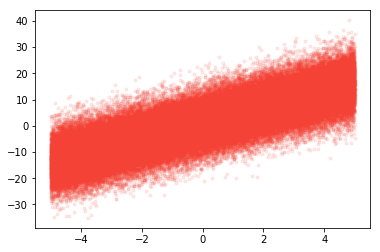

In [11]:
plt.scatter(x, y, color="#f44336", marker=".", alpha=0.1)
plt.show()

In [4]:
from playML.LinearRegression import LinearRegression

In [8]:
%%time
reg = LinearRegression()
reg.fit_sgd(X, y, n_iters_max=10)
print(reg.coef_)
print(reg.intercept_)

[ 2.99416205]
0.985822912942
CPU times: user 5.19 s, sys: 0 ns, total: 5.19 s
Wall time: 5.19 s


In [15]:
import sklearn.datasets as datasets

boston = datasets.load_boston()
X = boston.data
y = boston.target

X = X[y < 50]
y = y[y < 50]

In [16]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=666)

In [20]:
from sklearn.preprocessing import StandardScaler

standardScaler = StandardScaler()
standardScaler.fit(X_train)

X_train_standard = standardScaler.transform(X_train)
X_test_standard = standardScaler.transform(X_test)

In [22]:
from playML.LinearRegression import LinearRegression
reg = LinearRegression()

In [25]:
%%time
reg.fit_sgd(X_train_standard, y_train, n_iters_max=2)
score = reg.score(X_test_standard, y_test)
print(score)

0.749277645893
CPU times: user 3.47 ms, sys: 3.98 ms, total: 7.45 ms
Wall time: 6.13 ms


In [26]:
%%time
reg.fit_sgd(X_train_standard, y_train, n_iters_max=10)
score = reg.score(X_test_standard, y_test)
print(score)

0.811693290364
CPU times: user 46 ms, sys: 3.89 ms, total: 49.9 ms
Wall time: 45.9 ms


In [29]:
%%time
reg.fit_sgd(X_train_standard, y_train, n_iters_max=50)
score = reg.score(X_test_standard, y_test)
print(score)

0.813247781388
CPU times: user 110 ms, sys: 0 ns, total: 110 ms
Wall time: 109 ms


#### scikit-learn中的SGD

In [34]:
from sklearn.linear_model import SGDRegressor

sgd = SGDRegressor()
%time sgd.fit(X_train_standard, y_train)
sgd.score(X_test_standard, y_test)

CPU times: user 2.21 ms, sys: 57 µs, total: 2.27 ms
Wall time: 1.19 ms


/usr/lib/python3/dist-packages/sklearn/linear_model/stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDRegressor'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)


0.80226012691432924